<a href="https://colab.research.google.com/github/Ishita95-harvad/Collection-of-Recipes-around-the-world/blob/main/Collection_of_Recipes_around_the_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collection of Recipes around the world

Explore recipes around the world with cooking times and nutrition.

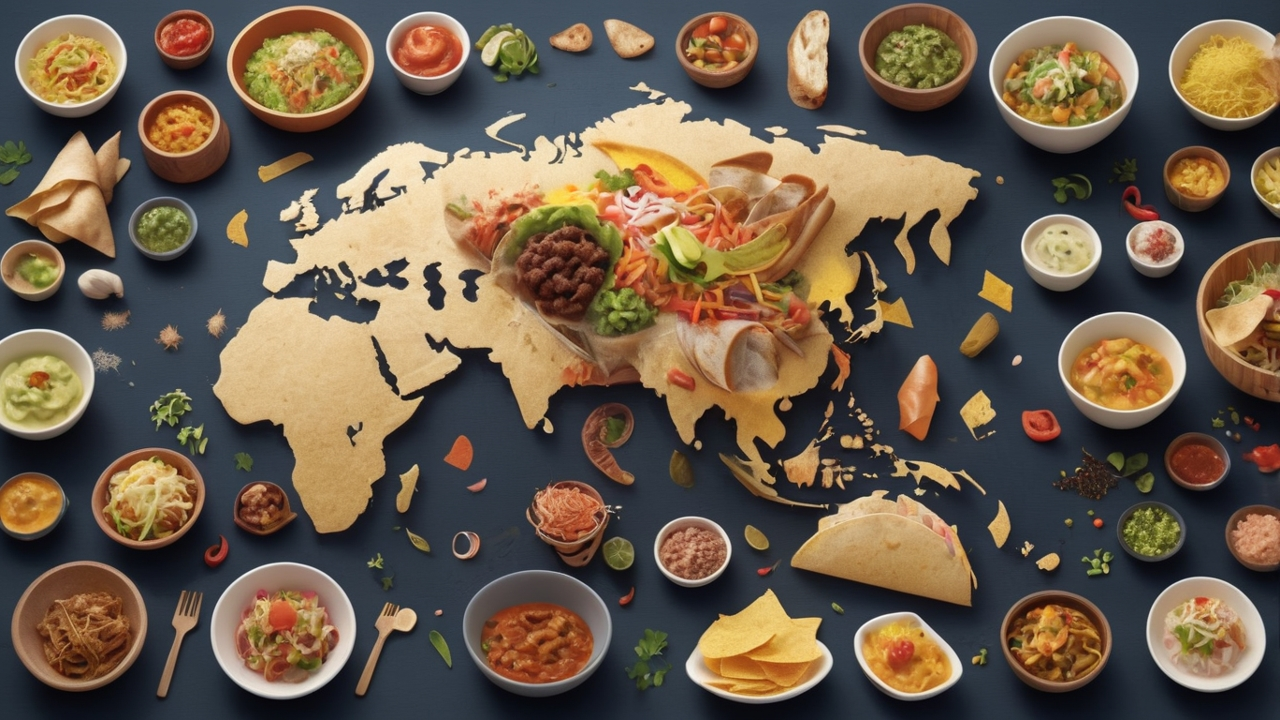

# Task
create a workflow and run and execute

Here is all the data you need:
"Receipes from around the world.csv"

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prajwaldongre/collection-of-recipes-around-the-world")

print("Path to dataset files:", path)

100%|██████████| 9.43k/9.43k [00:00<00:00, 2.85MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/prajwaldongre/collection-of-recipes-around-the-world/versions/1


## Data loading

### Subtask:
Load the "Receipes from around the world.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows along with its shape.



In [2]:
import pandas as pd

try:
    df_recipes = pd.read_csv('Receipes from around the world.csv', encoding='latin-1')
    display(df_recipes.head())
    print(df_recipes.shape)
except FileNotFoundError:
    print("Error: 'Receipes from around the world.csv' not found.")
    df_recipes = None
except Exception as e:
    print(f"An error occurred: {e}")
    df_recipes = None

,recipe_name,cuisine,ingredients,cooking_time_minutes,prep_time_minutes,servings,calories_per_serving,dietary_restrictions
0,Spicy Kimchi Fried Rice,Korean,"['Cooked rice', 'Kimchi', 'Gochujang', 'Soy sa...",25,15,2.0,450.0,['vegetarian']
1,Classic Margherita Pizza,Italian,"['Pizza dough', 'Tomato sauce', 'Fresh mozzare...",20,30,4.0,350.0,['vegetarian']
2,Coconut Chickpea Curry,Indian,"['Chickpeas', 'Coconut milk', 'Onion', 'Ginger...",35,15,4.0,480.0,"['vegan', 'vegetarian', 'gluten-free', 'dairy-..."
3,Pad See Ew with Tofu,Thai,"['Wide rice noodles', 'Tofu', 'Chinese broccol...",20,10,2.0,520.0,['vegetarian']
4,Beef Bourguignon,French,"['Beef chuck', 'Red wine', 'Bacon', 'Onion', '...",150,30,6.0,680.0,['nan']


(161, 8)


## Data exploration

### Subtask:
Explore the loaded recipe data to understand its characteristics.


**Reasoning**:
Examine the data types, missing values, and distributions of key variables in the dataframe.



In [3]:
# Check data types
print(df_recipes.dtypes)

# Identify missing values
print("\nMissing values per column:\n", df_recipes.isnull().sum())

# Analyze 'cuisine' distribution
print("\nCuisine distribution:\n", df_recipes['cuisine'].value_counts())

# Analyze 'ingredients' (preliminary exploration)
# (Further analysis would involve more advanced text processing)
print("\nIngredients (first 5 entries):\n", df_recipes['ingredients'].head())

# Analyze numerical distributions (example: 'cooking_time')
print("\nCooking time statistics:\n", df_recipes['cooking_time_minutes'].describe())
print("\nPreparation time statistics:\n", df_recipes['prep_time_minutes'].describe())
print("\nServings statistics:\n", df_recipes['servings'].describe())
print("\nCalories per serving statistics:\n", df_recipes['calories_per_serving'].describe())

recipe_name              object
cuisine                  object
ingredients              object
cooking_time_minutes      int64
prep_time_minutes         int64
servings                float64
calories_per_serving    float64
dietary_restrictions     object
dtype: object

Missing values per column:
 recipe_name             0
cuisine                 0
ingredients             0
cooking_time_minutes    0
prep_time_minutes       0
servings                4
calories_per_serving    5
dietary_restrictions    0
dtype: int64

Cuisine distribution:
 cuisine
Argentinian    12
Swedish        10
Nigerian        9
Japanese        9
Ethiopian       8
Korean          8
Thai            8
Peruvian        8
Australian      8
Brazilian       7
Polynesian      7
Mexican         7
French          7
Spanish         7
Italian         6
Greek           6
American        6
Vietnamese      6
Jamaican        5
Moroccan        5
Irish           5
Lebanese        5
Indian          1
Chinese         1
Name: count, dty

## Data cleaning

### Subtask:
Clean the recipe data by handling missing values and inconsistencies.


**Reasoning**:
Impute missing values in 'servings' and 'calories_per_serving' using the median, standardize ingredient names, remove duplicates, and handle outliers in 'cooking_time_minutes'.



In [5]:
# Impute missing values
df_recipes['servings'] = df_recipes['servings'].fillna(df_recipes['servings'].median())
df_recipes['calories_per_serving'] = df_recipes['calories_per_serving'].fillna(df_recipes['calories_per_serving'].median())

# Ingredient consistency
def standardize_ingredients(ingredients_list):
    if isinstance(ingredients_list, str):
        ingredients_list = eval(ingredients_list)  # Safely evaluate the string representation of a list
    return tuple(ingredient.lower() for ingredient in ingredients_list) # Convert to tuple

df_recipes['ingredients_cleaned'] = df_recipes['ingredients'].apply(standardize_ingredients)

# Duplicate recipe removal
df_recipes.drop_duplicates(inplace=True)

# Outlier detection and handling (cooking time)
# Using IQR method to detect outliers.
Q1 = df_recipes['cooking_time_minutes'].quantile(0.25)
Q3 = df_recipes['cooking_time_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
median_cooking_time = df_recipes['cooking_time_minutes'].median()
df_recipes.loc[(df_recipes['cooking_time_minutes'] < lower_bound) | (df_recipes['cooking_time_minutes'] > upper_bound), 'cooking_time_minutes'] = median_cooking_time

display(df_recipes.head())

,recipe_name,cuisine,ingredients,cooking_time_minutes,prep_time_minutes,servings,calories_per_serving,dietary_restrictions,ingredients_cleaned
0,Spicy Kimchi Fried Rice,Korean,"['Cooked rice', 'Kimchi', 'Gochujang', 'Soy sa...",25,15,2.0,450.0,['vegetarian'],"(cooked rice, kimchi, gochujang, soy sauce, se..."
1,Classic Margherita Pizza,Italian,"['Pizza dough', 'Tomato sauce', 'Fresh mozzare...",20,30,4.0,350.0,['vegetarian'],"(pizza dough, tomato sauce, fresh mozzarella, ..."
2,Coconut Chickpea Curry,Indian,"['Chickpeas', 'Coconut milk', 'Onion', 'Ginger...",35,15,4.0,480.0,"['vegan', 'vegetarian', 'gluten-free', 'dairy-...","(chickpeas, coconut milk, onion, ginger, garli..."
3,Pad See Ew with Tofu,Thai,"['Wide rice noodles', 'Tofu', 'Chinese broccol...",20,10,2.0,520.0,['vegetarian'],"(wide rice noodles, tofu, chinese broccoli, so..."
4,Beef Bourguignon,French,"['Beef chuck', 'Red wine', 'Bacon', 'Onion', '...",45,30,6.0,680.0,['nan'],"(beef chuck, red wine, bacon, onion, carrots, ..."


## Data wrangling

### Subtask:
Transform the ingredient lists into a numerical representation suitable for machine learning.


**Reasoning**:
Create an ingredient vocabulary, one-hot encode the ingredients, and concatenate the result with the original DataFrame.



In [6]:
from collections import defaultdict

# Create ingredient vocabulary
ingredient_vocabulary = set()
for ingredients_list in df_recipes['ingredients_cleaned']:
    ingredient_vocabulary.update(ingredients_list)

# One-hot encode ingredients
one_hot_encoded = defaultdict(list)
for _, row in df_recipes.iterrows():
    for ingredient in ingredient_vocabulary:
        one_hot_encoded[ingredient].append(1 if ingredient in row['ingredients_cleaned'] else 0)
one_hot_df = pd.DataFrame(one_hot_encoded, index=df_recipes.index)

# Concatenate with original DataFrame
df_recipes = pd.concat([df_recipes, one_hot_df], axis=1)

# Display first few rows to verify the result
display(df_recipes.head())

,recipe_name,cuisine,ingredients,cooking_time_minutes,prep_time_minutes,servings,calories_per_serving,dietary_restrictions,ingredients_cleaned,celery,...,bread,egg,sherry vinegar,salsa,guanciale (or pancetta/bacon),cucumber,soy sauce,shredded cabbage,bean sprouts,cardamom pods
0,Spicy Kimchi Fried Rice,Korean,"['Cooked rice', 'Kimchi', 'Gochujang', 'Soy sa...",25,15,2.0,450.0,['vegetarian'],"(cooked rice, kimchi, gochujang, soy sauce, se...",0,...,0,1,0,0,0,0,1,0,0,0
1,Classic Margherita Pizza,Italian,"['Pizza dough', 'Tomato sauce', 'Fresh mozzare...",20,30,4.0,350.0,['vegetarian'],"(pizza dough, tomato sauce, fresh mozzarella, ...",0,...,0,0,0,0,0,0,0,0,0,0
2,Coconut Chickpea Curry,Indian,"['Chickpeas', 'Coconut milk', 'Onion', 'Ginger...",35,15,4.0,480.0,"['vegan', 'vegetarian', 'gluten-free', 'dairy-...","(chickpeas, coconut milk, onion, ginger, garli...",0,...,0,0,0,0,0,0,0,0,0,0
3,Pad See Ew with Tofu,Thai,"['Wide rice noodles', 'Tofu', 'Chinese broccol...",20,10,2.0,520.0,['vegetarian'],"(wide rice noodles, tofu, chinese broccoli, so...",0,...,0,1,0,0,0,0,1,0,0,0
4,Beef Bourguignon,French,"['Beef chuck', 'Red wine', 'Bacon', 'Onion', '...",45,30,6.0,680.0,['nan'],"(beef chuck, red wine, bacon, onion, carrots, ...",1,...,0,0,0,0,0,0,0,0,0,0


## Data analysis

### Subtask:
Analyze the cleaned and wrangled recipe data to identify trends and patterns.


**Reasoning**:
Analyze the distribution of cuisines, identify frequent ingredients, explore relationships between numerical features, and investigate ingredient combinations for specific cuisines.



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code blocks)

# Ingredient associations with cuisines (corrected)
numerical_cols = df_recipes.select_dtypes(include=['number']).columns
cuisine_ingredient_matrix = df_recipes.groupby('cuisine')[numerical_cols].sum()

for cuisine in cuisine_ingredient_matrix.index:
    try:
      top_ingredients_cuisine = cuisine_ingredient_matrix.loc[cuisine].sort_values(ascending=False).head(5)
      print(f"\nTop 5 ingredients for {cuisine}:")
      print(top_ingredients_cuisine)
    except TypeError:
      print(f"Skipping cuisine {cuisine} due to a TypeError during sorting.")


Top 5 ingredients for American:
calories_per_serving    2769.0
cooking_time_minutes     463.0
prep_time_minutes        170.0
servings                  35.0
onion                      4.0
Name: American, dtype: float64

Top 5 ingredients for Argentinian:
calories_per_serving    4773.5
cooking_time_minutes     549.0
prep_time_minutes        273.0
servings                  78.0
olive oil                  4.0
Name: Argentinian, dtype: float64

Top 5 ingredients for Australian:
calories_per_serving    2334.0
cooking_time_minutes     329.0
prep_time_minutes        150.0
servings                  39.0
barley                     2.0
Name: Australian, dtype: float64

Top 5 ingredients for Brazilian:
calories_per_serving    2363.0
cooking_time_minutes     288.0
prep_time_minutes        155.0
servings                  68.0
rice                       3.0
Name: Brazilian, dtype: float64

Top 5 ingredients for Chinese:
calories_per_serving    510.0
cooking_time_minutes     56.0
prep_time_minutes   

## Data visualization

### Subtask:
Visualize the results of the data analysis, focusing on the distribution of cuisines, frequent ingredients, and relationships between numerical features.


**Reasoning**:
Create the visualizations as per the instructions, using the cleaned and prepared dataframe `df_recipes`.



<ipython-input-10-830ae819ef5e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')


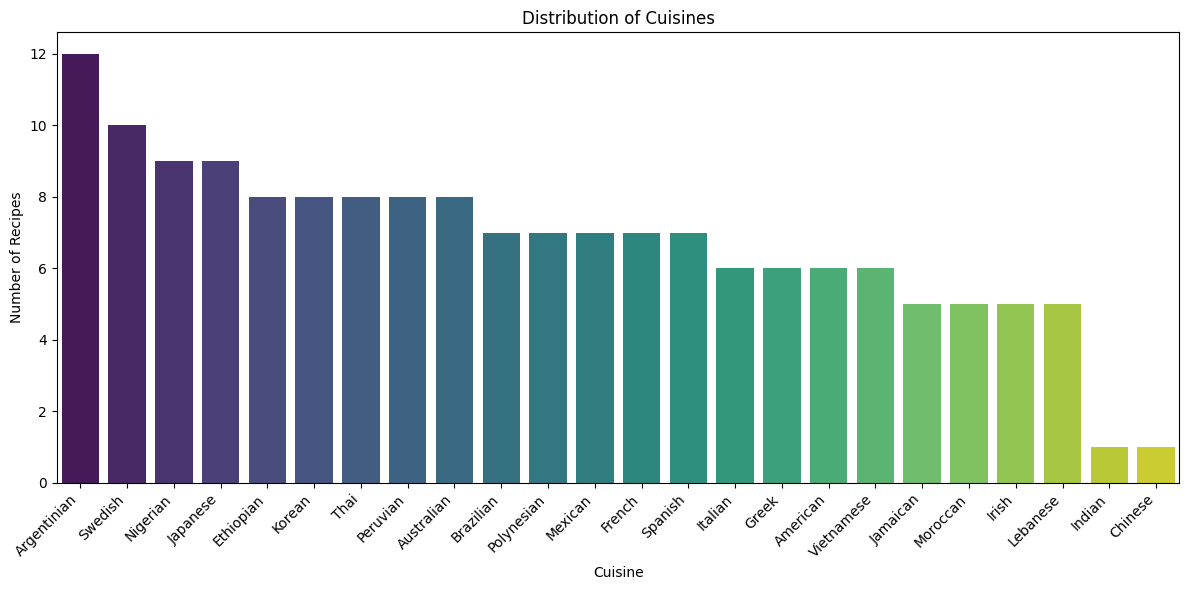

<ipython-input-10-830ae819ef5e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ingredient_counts.index, y=ingredient_counts.values, palette='magma')


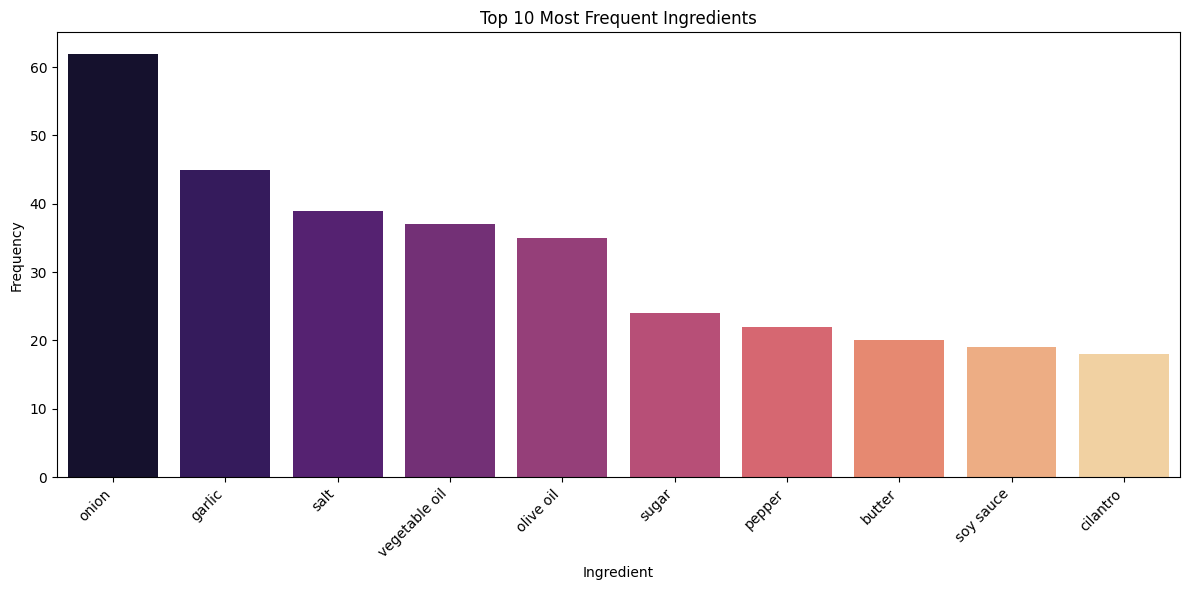

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

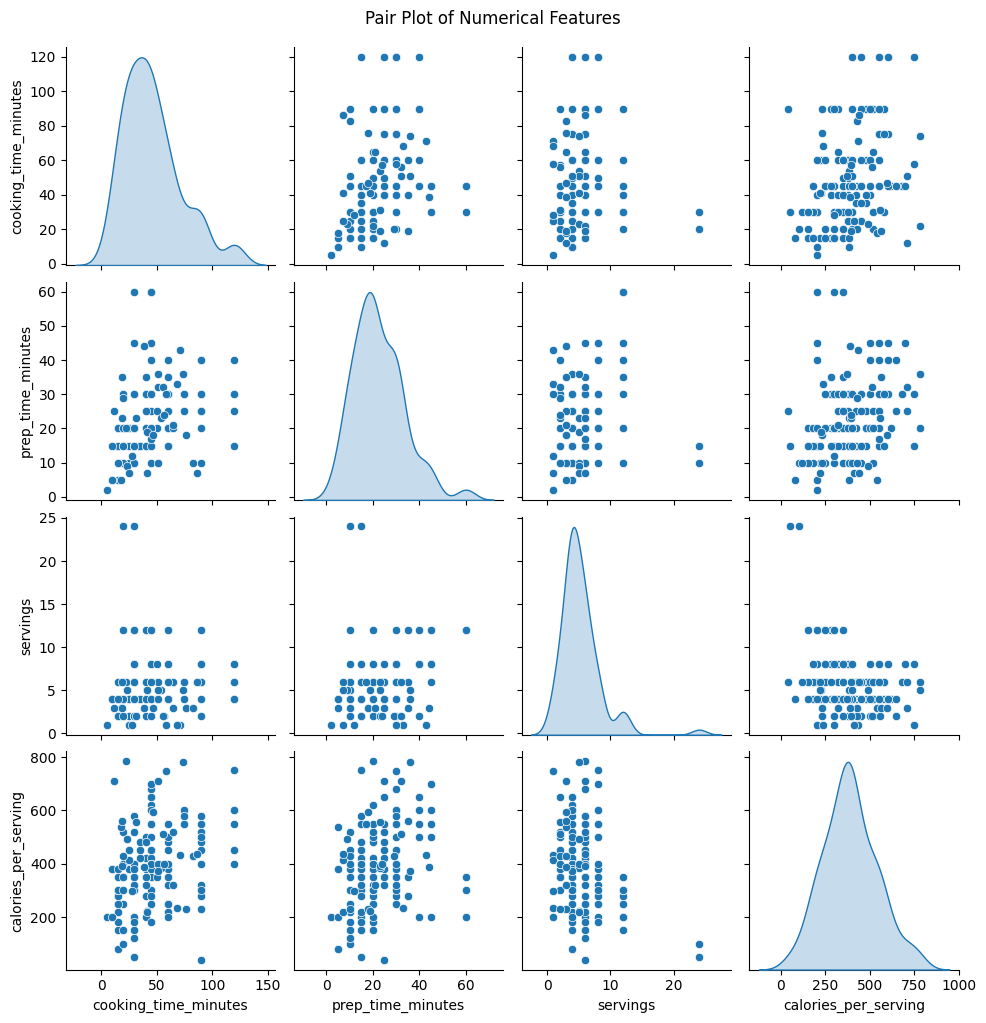

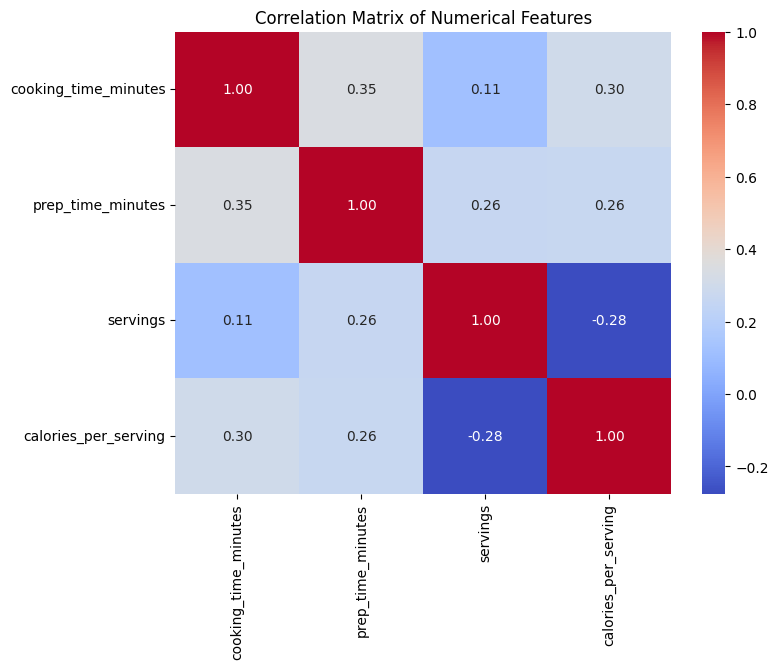

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cuisine Distribution
plt.figure(figsize=(12, 6))
cuisine_counts = df_recipes['cuisine'].value_counts()
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cuisine')
plt.ylabel('Number of Recipes')
plt.title('Distribution of Cuisines')
plt.tight_layout()
plt.show()

# 2. Top 10 Frequent Ingredients
plt.figure(figsize=(12, 6))
ingredient_counts = df_recipes[df_recipes.columns[9:]].sum().sort_values(ascending=False).head(10)
sns.barplot(x=ingredient_counts.index, y=ingredient_counts.values, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ingredient')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Ingredients')
plt.tight_layout()
plt.show()

# 3. Pair Plot of Numerical Features
numerical_features = ['cooking_time_minutes', 'prep_time_minutes', 'servings', 'calories_per_serving']
sns.pairplot(df_recipes[numerical_features], diag_kind='kde', palette='plasma')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df_recipes[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Feature engineering

### Subtask:
Prepare the data for clustering by selecting relevant features and scaling numerical features.


**Reasoning**:
Create a new DataFrame `df_clustering` with only the one-hot encoded ingredient columns and then scale the numerical features using StandardScaler.



In [11]:
from sklearn.preprocessing import StandardScaler

# Create df_clustering with one-hot encoded ingredients
ingredient_columns = df_recipes.columns[df_recipes.columns.get_loc('celery'):]
df_clustering = df_recipes[ingredient_columns].copy()

# Scale numerical features
scaler = StandardScaler()
df_clustering = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns, index=df_clustering.index)

display(df_clustering.head())

,celery,coconut milk or oil (optional),mint,breadcrumbs,burghul (cracked wheat),red pepper flakes,lime leaves,ginger,sweet potatoes,milk,...,bread,egg,sherry vinegar,salsa,guanciale (or pancetta/bacon),cucumber,soy sauce,shredded cabbage,bean sprouts,cardamom pods
0,-0.228665,-0.079057,-0.196748,-0.137795,-0.079057,-0.079057,-0.112154,-0.354787,-0.079057,-0.32053,...,-0.112154,5.585696,-0.079057,-0.079057,-0.079057,-0.112154,2.733804,-0.079057,-0.159617,-0.112154
1,-0.228665,-0.079057,-0.196748,-0.137795,-0.079057,-0.079057,-0.112154,-0.354787,-0.079057,-0.32053,...,-0.112154,-0.179029,-0.079057,-0.079057,-0.079057,-0.112154,-0.365791,-0.079057,-0.159617,-0.112154
2,-0.228665,-0.079057,-0.196748,-0.137795,-0.079057,-0.079057,-0.112154,2.818589,-0.079057,-0.32053,...,-0.112154,-0.179029,-0.079057,-0.079057,-0.079057,-0.112154,-0.365791,-0.079057,-0.159617,-0.112154
3,-0.228665,-0.079057,-0.196748,-0.137795,-0.079057,-0.079057,-0.112154,-0.354787,-0.079057,-0.32053,...,-0.112154,5.585696,-0.079057,-0.079057,-0.079057,-0.112154,2.733804,-0.079057,-0.159617,-0.112154
4,4.373214,-0.079057,-0.196748,-0.137795,-0.079057,-0.079057,-0.112154,-0.354787,-0.079057,-0.32053,...,-0.112154,-0.179029,-0.079057,-0.079057,-0.079057,-0.112154,-0.365791,-0.079057,-0.159617,-0.112154


## Data clustering

### Subtask:
Perform K-means clustering on the preprocessed recipe data.


**Reasoning**:
Perform K-means clustering on the preprocessed recipe data in `df_clustering`.



In [12]:
from sklearn.cluster import KMeans

# Initialize KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)  # Experiment with different n_clusters values

# Fit the model to the data
kmeans.fit(df_clustering)

# Add cluster assignments to the DataFrame
df_clustering['cluster'] = kmeans.labels_

# Display the first few rows of the DataFrame to verify the cluster assignments
display(df_clustering.head())

,celery,coconut milk or oil (optional),mint,breadcrumbs,burghul (cracked wheat),red pepper flakes,lime leaves,ginger,sweet potatoes,milk,...,egg,sherry vinegar,salsa,guanciale (or pancetta/bacon),cucumber,soy sauce,shredded cabbage,bean sprouts,cardamom pods,cluster
0,-0.228665,-0.079057,-0.196748,-0.137795,-0.079057,-0.079057,-0.112154,-0.354787,-0.079057,-0.32053,...,5.585696,-0.079057,-0.079057,-0.079057,-0.112154,2.733804,-0.079057,-0.159617,-0.112154,1
1,-0.228665,-0.079057,-0.196748,-0.137795,-0.079057,-0.079057,-0.112154,-0.354787,-0.079057,-0.32053,...,-0.179029,-0.079057,-0.079057,-0.079057,-0.112154,-0.365791,-0.079057,-0.159617,-0.112154,1
2,-0.228665,-0.079057,-0.196748,-0.137795,-0.079057,-0.079057,-0.112154,2.818589,-0.079057,-0.32053,...,-0.179029,-0.079057,-0.079057,-0.079057,-0.112154,-0.365791,-0.079057,-0.159617,-0.112154,1
3,-0.228665,-0.079057,-0.196748,-0.137795,-0.079057,-0.079057,-0.112154,-0.354787,-0.079057,-0.32053,...,5.585696,-0.079057,-0.079057,-0.079057,-0.112154,2.733804,-0.079057,-0.159617,-0.112154,4
4,4.373214,-0.079057,-0.196748,-0.137795,-0.079057,-0.079057,-0.112154,-0.354787,-0.079057,-0.32053,...,-0.179029,-0.079057,-0.079057,-0.079057,-0.112154,-0.365791,-0.079057,-0.159617,-0.112154,1


## Data visualization

### Subtask:
Visualize the clusters of recipes.


**Reasoning**:
Visualize the clusters using a scatter plot of the first two principal components, colored by cluster assignment.  Since df_clustering already contains the cluster assignments and is presumably already dimensionally reduced (or at least has numerical features), we can directly use its columns for plotting.



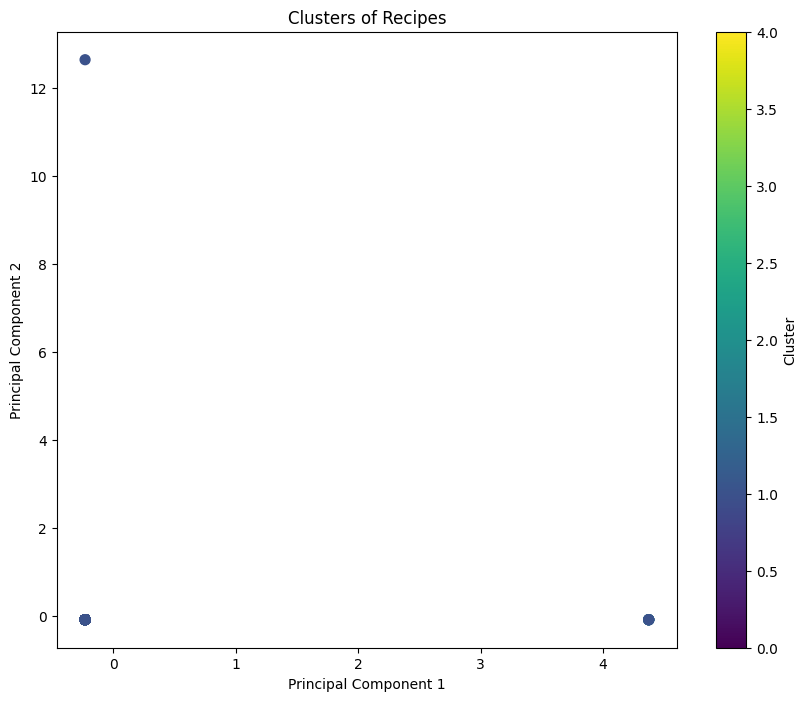

In [13]:
import matplotlib.pyplot as plt

# Assuming the first two columns of df_clustering are suitable for visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_clustering.iloc[:, 0], df_clustering.iloc[:, 1], c=df_clustering['cluster'], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of Recipes')
plt.colorbar(label='Cluster')
plt.show()

**Reasoning**:
The previous plot only used the first two columns.  The task suggests exploring other dimensions or dimensionality reduction techniques if more than two principal components are available.  Let's try a 3D scatter plot using the first three columns, if available, to see if it offers a better visualization.



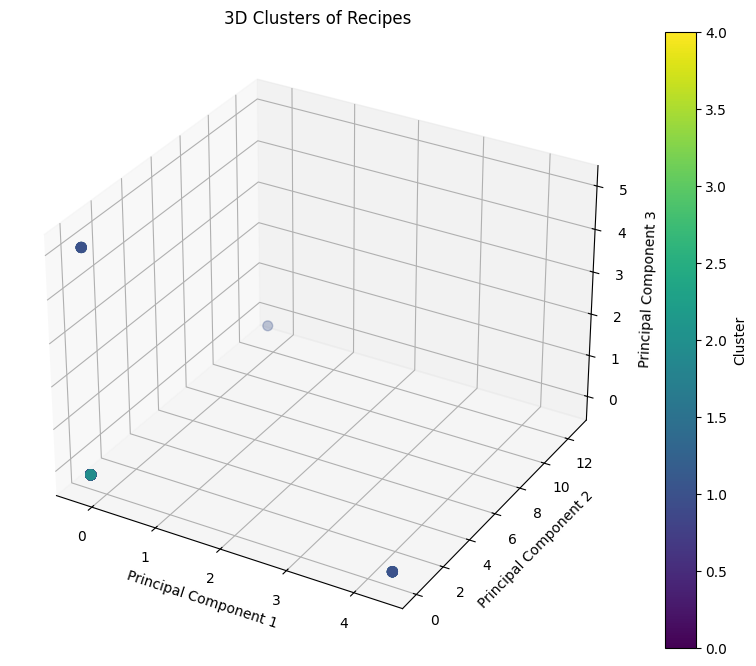

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Check if there are at least three columns available
if len(df_clustering.columns) >= 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_clustering.iloc[:, 0], df_clustering.iloc[:, 1], df_clustering.iloc[:, 2], c=df_clustering['cluster'], cmap='viridis', s=50)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D Clusters of Recipes')
    fig.colorbar(ax.collections[0], label='Cluster')
    plt.show()
else:
    print("Not enough dimensions for 3D visualization.")

**Reasoning**:
The subtask is to visualize the clusters.  We've tried 2D and 3D scatter plots.  Let's try visualizing the distribution of numerical features across the clusters using box plots. This could offer additional insights into the characteristics of each cluster.



<ipython-input-16-9409b8bcc6d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=temp_df, palette='Set3')
<ipython-input-16-9409b8bcc6d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=temp_df, palette='Set3')
<ipython-input-16-9409b8bcc6d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=temp_df, palette='Set3')
<ipython-input-16-9409b8bcc6d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

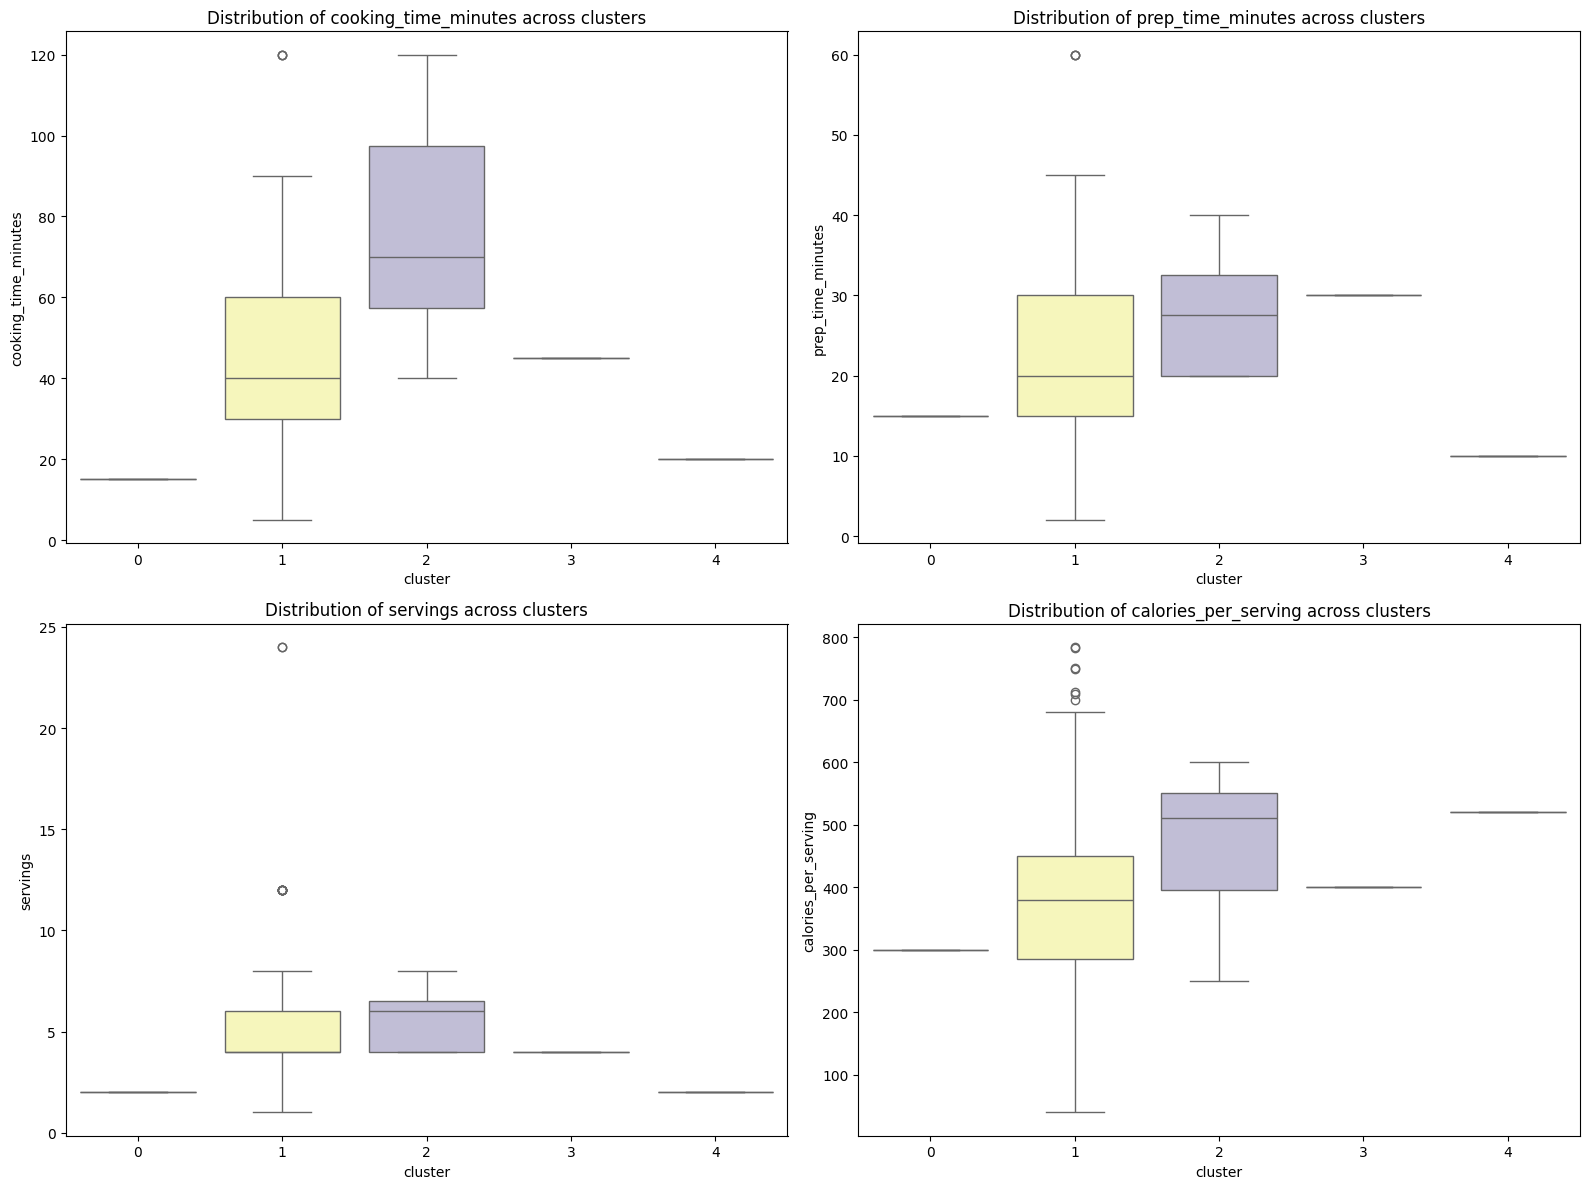

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['cooking_time_minutes', 'prep_time_minutes', 'servings', 'calories_per_serving']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    # Access the feature from df_recipes, but use cluster from df_clustering
    plt.subplot(2, 2, i + 1)
    try:
        # Join df_recipes and df_clustering to have numerical features and cluster assignments
        temp_df = df_recipes[[feature]].join(df_clustering['cluster'], how="inner")
        sns.boxplot(x='cluster', y=feature, data=temp_df, palette='Set3')
    except KeyError:
        print(f"Feature '{feature}' not found in df_recipes.")
        continue  # Skip to the next feature if it's not found
    plt.title(f'Distribution of {feature} across clusters')
plt.tight_layout()
plt.show()